In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df.job_skills.apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head()

/opt/anaconda3/envs/python_data_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [2]:
df = df.explode("job_skills", ignore_index=True)
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
3,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
4,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777315,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
3777316,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
3777317,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
3777318,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [3]:
df["job_posted_month"] = df.job_posted_date.dt.strftime("%b")
df["month_no"] = df.job_posted_date.dt.month
df.sort_values(by="month_no", inplace=True)
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,month_no
910954,Data Engineer,MyGlamm - Data Engineer - Big Data/Redshift,India,via LinkedIn,Full-time,False,India,2023-01-13 15:13:27,False,False,India,None,NaN,NaN,MyGlamm | Good Glamm Group,nosql,"{'cloud': ['aws', 'redshift'], 'libraries': ['...",Jan,1
823584,Data Scientist,Staff Data Scientist (ML) - Order Risk (Remote...,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-01-31 15:04:04,False,False,United States,None,NaN,NaN,Shopify,sql,"{'analyst_tools': ['excel'], 'libraries': ['sp...",Jan,1
823585,Data Scientist,Staff Data Scientist (ML) - Order Risk (Remote...,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-01-31 15:04:04,False,False,United States,None,NaN,NaN,Shopify,spark,"{'analyst_tools': ['excel'], 'libraries': ['sp...",Jan,1
823586,Data Scientist,Staff Data Scientist (ML) - Order Risk (Remote...,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-01-31 15:04:04,False,False,United States,None,NaN,NaN,Shopify,excel,"{'analyst_tools': ['excel'], 'libraries': ['sp...",Jan,1
2880278,Business Analyst,Business Intelligence Analyst,Anywhere,via LinkedIn,None,True,Philippines,2023-01-31 09:13:50,True,False,Philippines,None,NaN,NaN,Skuad,snowflake,"{'analyst_tools': ['power bi'], 'cloud': ['sno...",Jan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822394,Data Engineer,"Manager, Data Protection (Backup, Recovery & D...","Dublin, Ireland",via LinkedIn,Full-time,False,Ireland,2023-12-13 16:16:20,False,False,Ireland,None,NaN,NaN,Pfizer,aws,"{'cloud': ['vmware', 'oracle', 'aws'], 'databa...",Dec,12
2881795,Cloud Engineer,Azure/AWS/Gcp Cloud Big Data engineer 5-18yr (...,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-12-08 09:11:46,False,False,India,None,NaN,NaN,Impetus,sql,"{'cloud': ['aws', 'redshift', 'gcp'], 'librari...",Dec,12
2881796,Cloud Engineer,Azure/AWS/Gcp Cloud Big Data engineer 5-18yr (...,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-12-08 09:11:46,False,False,India,None,NaN,NaN,Impetus,python,"{'cloud': ['aws', 'redshift', 'gcp'], 'librari...",Dec,12
822410,Data Engineer,Remote Senior Data Engineer,"Hopewell, FL",via BeBee,Full-time,False,"Illinois, United States",2023-12-17 15:08:04,False,True,United States,None,NaN,NaN,Seattle Children's,sql,"{'analyst_tools': ['sas', 'spss'], 'async': ['...",Dec,12


In [4]:
df.drop(columns="month_no", inplace=True)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
910954,Data Engineer,MyGlamm - Data Engineer - Big Data/Redshift,India,via LinkedIn,Full-time,False,India,2023-01-13 15:13:27,False,False,India,None,NaN,NaN,MyGlamm | Good Glamm Group,nosql,"{'cloud': ['aws', 'redshift'], 'libraries': ['...",Jan
823584,Data Scientist,Staff Data Scientist (ML) - Order Risk (Remote...,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-01-31 15:04:04,False,False,United States,None,NaN,NaN,Shopify,sql,"{'analyst_tools': ['excel'], 'libraries': ['sp...",Jan
823585,Data Scientist,Staff Data Scientist (ML) - Order Risk (Remote...,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-01-31 15:04:04,False,False,United States,None,NaN,NaN,Shopify,spark,"{'analyst_tools': ['excel'], 'libraries': ['sp...",Jan
823586,Data Scientist,Staff Data Scientist (ML) - Order Risk (Remote...,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-01-31 15:04:04,False,False,United States,None,NaN,NaN,Shopify,excel,"{'analyst_tools': ['excel'], 'libraries': ['sp...",Jan
2880278,Business Analyst,Business Intelligence Analyst,Anywhere,via LinkedIn,None,True,Philippines,2023-01-31 09:13:50,True,False,Philippines,None,NaN,NaN,Skuad,snowflake,"{'analyst_tools': ['power bi'], 'cloud': ['sno...",Jan


In [5]:
top_skills = df.job_skills.value_counts().head().index.to_list()
top_skills

['sql', 'python', 'aws', 'azure', 'r']

In [6]:
df_top_skills = df[df["job_skills"].isin(top_skills)]
df_top_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
823584,Data Scientist,Staff Data Scientist (ML) - Order Risk (Remote...,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-01-31 15:04:04,False,False,United States,None,NaN,NaN,Shopify,sql,"{'analyst_tools': ['excel'], 'libraries': ['sp...",Jan
823657,Senior Data Scientist,"Senior Data Scientist, Commercial Bank","New York, NY",via Monster,Full-time,False,"New York, United States",2023-01-04 00:31:27,False,False,United States,None,NaN,NaN,Capital One,python,"{'cloud': ['aws'], 'libraries': ['spark'], 'pr...",Jan
823658,Senior Data Scientist,"Senior Data Scientist, Commercial Bank","New York, NY",via Monster,Full-time,False,"New York, United States",2023-01-04 00:31:27,False,False,United States,None,NaN,NaN,Capital One,sql,"{'cloud': ['aws'], 'libraries': ['spark'], 'pr...",Jan
823659,Senior Data Scientist,"Senior Data Scientist, Commercial Bank","New York, NY",via Monster,Full-time,False,"New York, United States",2023-01-04 00:31:27,False,False,United States,None,NaN,NaN,Capital One,aws,"{'cloud': ['aws'], 'libraries': ['spark'], 'pr...",Jan
823583,Data Scientist,Staff Data Scientist (ML) - Order Risk (Remote...,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-01-31 15:04:04,False,False,United States,None,NaN,NaN,Shopify,python,"{'analyst_tools': ['excel'], 'libraries': ['sp...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470305,Data Engineer,Data Engineer,Netherlands,via BeBee,Full-time,False,Netherlands,2023-12-16 17:17:07,True,False,Netherlands,None,NaN,NaN,Eneco eMobility B.V.,sql,"{'cloud': ['snowflake', 'redshift', 'bigquery'...",Dec
822394,Data Engineer,"Manager, Data Protection (Backup, Recovery & D...","Dublin, Ireland",via LinkedIn,Full-time,False,Ireland,2023-12-13 16:16:20,False,False,Ireland,None,NaN,NaN,Pfizer,aws,"{'cloud': ['vmware', 'oracle', 'aws'], 'databa...",Dec
2881795,Cloud Engineer,Azure/AWS/Gcp Cloud Big Data engineer 5-18yr (...,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-12-08 09:11:46,False,False,India,None,NaN,NaN,Impetus,sql,"{'cloud': ['aws', 'redshift', 'gcp'], 'librari...",Dec
2881796,Cloud Engineer,Azure/AWS/Gcp Cloud Big Data engineer 5-18yr (...,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-12-08 09:11:46,False,False,India,None,NaN,NaN,Impetus,python,"{'cloud': ['aws', 'redshift', 'gcp'], 'librari...",Dec


In [7]:
df_pivot = df_top_skills.pivot_table(index="job_posted_month", columns="job_skills", aggfunc="size")
df_pivot

job_skills,aws,azure,python,r,sql
job_posted_month,,,,,
Apr,11635,10557,30482,10647,31096
Aug,13817,12193,36228,13037,36699
Dec,10266,9437,26678,8367,26109
Feb,12219,11114,31943,11288,32720
Jan,16805,15385,44889,16351,45774
Jul,12017,10960,31257,10793,31869
Jun,11759,10793,31216,10820,31671
Mar,12458,11152,31990,11358,32282
May,10394,9111,26908,9339,27096


In [8]:
type(df_pivot)

pandas.core.frame.DataFrame

In [9]:
df_pivot["month_no"] = pd.to_datetime(df_pivot.index, format="%b").month
df_pivot

job_skills,aws,azure,python,r,sql,month_no
job_posted_month,,,,,,
Apr,11635,10557,30482,10647,31096,4
Aug,13817,12193,36228,13037,36699,8
Dec,10266,9437,26678,8367,26109,12
Feb,12219,11114,31943,11288,32720,2
Jan,16805,15385,44889,16351,45774,1
Jul,12017,10960,31257,10793,31869,7
Jun,11759,10793,31216,10820,31671,6
Mar,12458,11152,31990,11358,32282,3
May,10394,9111,26908,9339,27096,5


In [10]:
df_pivot.sort_values(by="month_no", inplace=True)
df_pivot

job_skills,aws,azure,python,r,sql,month_no
job_posted_month,,,,,,
Jan,16805,15385,44889,16351,45774,1
Feb,12219,11114,31943,11288,32720,2
Mar,12458,11152,31990,11358,32282,3
Apr,11635,10557,30482,10647,31096,4
May,10394,9111,26908,9339,27096,5
Jun,11759,10793,31216,10820,31671,6
Jul,12017,10960,31257,10793,31869,7
Aug,13817,12193,36228,13037,36699,8
Sep,10934,10221,28616,9248,28926,9


In [11]:
df_pivot.drop(columns="month_no", inplace=True)
df_pivot

job_skills,aws,azure,python,r,sql
job_posted_month,,,,,
Jan,16805,15385,44889,16351,45774
Feb,12219,11114,31943,11288,32720
Mar,12458,11152,31990,11358,32282
Apr,11635,10557,30482,10647,31096
May,10394,9111,26908,9339,27096
Jun,11759,10793,31216,10820,31671
Jul,12017,10960,31257,10793,31869
Aug,13817,12193,36228,13037,36699
Sep,10934,10221,28616,9248,28926


<Axes: xlabel='job_posted_month'>

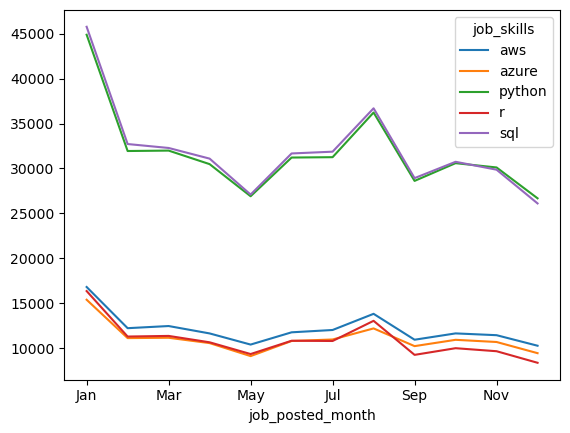

In [12]:
df_pivot.plot(kind="line")

In [13]:
df_pivot_5 = df_pivot[top_skills]
df_pivot_5

job_skills,sql,python,aws,azure,r
job_posted_month,,,,,
Jan,45774,44889,16805,15385,16351
Feb,32720,31943,12219,11114,11288
Mar,32282,31990,12458,11152,11358
Apr,31096,30482,11635,10557,10647
May,27096,26908,10394,9111,9339
Jun,31671,31216,11759,10793,10820
Jul,31869,31257,12017,10960,10793
Aug,36699,36228,13817,12193,13037
Sep,28926,28616,10934,10221,9248


<Axes: title={'center': 'Top 5 skills for any job'}, xlabel='job_posted_month'>

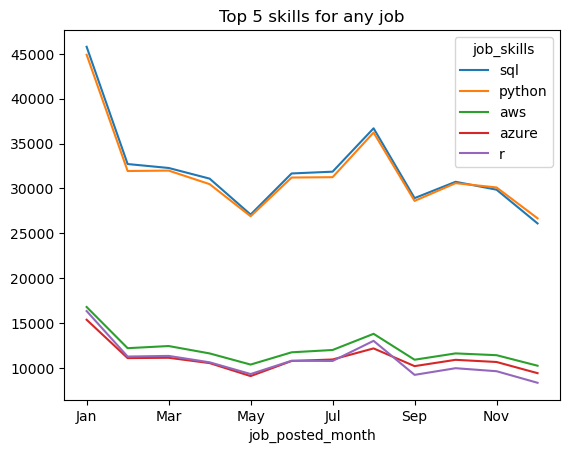

In [14]:
df_pivot_5.plot(kind="line", title="Top 5 skills for any job")

In [15]:
df_DA = df[df["job_title_short"] == "Data Analyst"]
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
2880184,Data Analyst,Regulated Compliance Data Analyst,"Chesterfield, MO",via AgHires,Full-time,False,"Illinois, United States",2023-01-18 09:03:18,False,True,United States,None,NaN,NaN,Bayer,None,None,Jan
823511,Data Analyst,Admission Data Analyst,"Fort Worth, TX",via BeBee,Full-time,False,"Texas, United States",2023-01-29 15:01:36,False,False,United States,None,NaN,NaN,Texas Christian University,flow,"{'analyst_tools': ['tableau', 'excel'], 'other...",Jan
823518,Data Analyst,Web Data Analytics,"Copenhagen, Denmark",via BeBee,Full-time,False,Denmark,2023-01-22 15:57:06,True,False,Denmark,None,NaN,NaN,Publicis Sapient,javascript,"{'analyst_tools': ['excel'], 'async': ['jira',...",Jan
823519,Data Analyst,Web Data Analytics,"Copenhagen, Denmark",via BeBee,Full-time,False,Denmark,2023-01-22 15:57:06,True,False,Denmark,None,NaN,NaN,Publicis Sapient,html,"{'analyst_tools': ['excel'], 'async': ['jira',...",Jan
823520,Data Analyst,Web Data Analytics,"Copenhagen, Denmark",via BeBee,Full-time,False,Denmark,2023-01-22 15:57:06,True,False,Denmark,None,NaN,NaN,Publicis Sapient,css,"{'analyst_tools': ['excel'], 'async': ['jira',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822354,Data Analyst,Customer Experience Data Analyst,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-12-12 15:40:04,True,False,Spain,None,NaN,NaN,Santander,tableau,"{'analyst_tools': ['sas', 'power bi', 'tableau...",Dec
822353,Data Analyst,Customer Experience Data Analyst,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-12-12 15:40:04,True,False,Spain,None,NaN,NaN,Santander,power bi,"{'analyst_tools': ['sas', 'power bi', 'tableau...",Dec
822352,Data Analyst,Customer Experience Data Analyst,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-12-12 15:40:04,True,False,Spain,None,NaN,NaN,Santander,sas,"{'analyst_tools': ['sas', 'power bi', 'tableau...",Dec
822351,Data Analyst,Customer Experience Data Analyst,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-12-12 15:40:04,True,False,Spain,None,NaN,NaN,Santander,sas,"{'analyst_tools': ['sas', 'power bi', 'tableau...",Dec


In [16]:
df_DA["job_skills"] = df_DA.job_skills.apply(lambda skill: skill.upper() if pd.notna(skill) else skill)
df_DA

/tmp/ipykernel_401148/1273555752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA["job_skills"] = df_DA.job_skills.apply(lambda skill: skill.upper() if pd.notna(skill) else skill)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
2880184,Data Analyst,Regulated Compliance Data Analyst,"Chesterfield, MO",via AgHires,Full-time,False,"Illinois, United States",2023-01-18 09:03:18,False,True,United States,None,NaN,NaN,Bayer,None,None,Jan
823511,Data Analyst,Admission Data Analyst,"Fort Worth, TX",via BeBee,Full-time,False,"Texas, United States",2023-01-29 15:01:36,False,False,United States,None,NaN,NaN,Texas Christian University,FLOW,"{'analyst_tools': ['tableau', 'excel'], 'other...",Jan
823518,Data Analyst,Web Data Analytics,"Copenhagen, Denmark",via BeBee,Full-time,False,Denmark,2023-01-22 15:57:06,True,False,Denmark,None,NaN,NaN,Publicis Sapient,JAVASCRIPT,"{'analyst_tools': ['excel'], 'async': ['jira',...",Jan
823519,Data Analyst,Web Data Analytics,"Copenhagen, Denmark",via BeBee,Full-time,False,Denmark,2023-01-22 15:57:06,True,False,Denmark,None,NaN,NaN,Publicis Sapient,HTML,"{'analyst_tools': ['excel'], 'async': ['jira',...",Jan
823520,Data Analyst,Web Data Analytics,"Copenhagen, Denmark",via BeBee,Full-time,False,Denmark,2023-01-22 15:57:06,True,False,Denmark,None,NaN,NaN,Publicis Sapient,CSS,"{'analyst_tools': ['excel'], 'async': ['jira',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822354,Data Analyst,Customer Experience Data Analyst,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-12-12 15:40:04,True,False,Spain,None,NaN,NaN,Santander,TABLEAU,"{'analyst_tools': ['sas', 'power bi', 'tableau...",Dec
822353,Data Analyst,Customer Experience Data Analyst,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-12-12 15:40:04,True,False,Spain,None,NaN,NaN,Santander,POWER BI,"{'analyst_tools': ['sas', 'power bi', 'tableau...",Dec
822352,Data Analyst,Customer Experience Data Analyst,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-12-12 15:40:04,True,False,Spain,None,NaN,NaN,Santander,SAS,"{'analyst_tools': ['sas', 'power bi', 'tableau...",Dec
822351,Data Analyst,Customer Experience Data Analyst,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-12-12 15:40:04,True,False,Spain,None,NaN,NaN,Santander,SAS,"{'analyst_tools': ['sas', 'power bi', 'tableau...",Dec


In [17]:
top_5_skill_DA = df_DA.job_skills.value_counts().head().index.to_list()
top_5_skill_DA

['SQL', 'EXCEL', 'PYTHON', 'TABLEAU', 'POWER BI']

In [18]:
df_DA_top_5 = df_DA[df_DA["job_skills"].isin(top_5_skill_DA)]
df_DA_top_5

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
823522,Data Analyst,Web Data Analytics,"Copenhagen, Denmark",via BeBee,Full-time,False,Denmark,2023-01-22 15:57:06,True,False,Denmark,None,NaN,NaN,Publicis Sapient,EXCEL,"{'analyst_tools': ['excel'], 'async': ['jira',...",Jan
823510,Data Analyst,Admission Data Analyst,"Fort Worth, TX",via BeBee,Full-time,False,"Texas, United States",2023-01-29 15:01:36,False,False,United States,None,NaN,NaN,Texas Christian University,EXCEL,"{'analyst_tools': ['tableau', 'excel'], 'other...",Jan
823509,Data Analyst,Admission Data Analyst,"Fort Worth, TX",via BeBee,Full-time,False,"Texas, United States",2023-01-29 15:01:36,False,False,United States,None,NaN,NaN,Texas Christian University,TABLEAU,"{'analyst_tools': ['tableau', 'excel'], 'other...",Jan
823507,Data Analyst,Admission Data Analyst,"Fort Worth, TX",via BeBee,Full-time,False,"Texas, United States",2023-01-29 15:01:36,False,False,United States,None,NaN,NaN,Texas Christian University,PYTHON,"{'analyst_tools': ['tableau', 'excel'], 'other...",Jan
2880484,Data Analyst,Data Analyst,"Austin, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-03 18:29:17,False,True,United States,None,NaN,NaN,"IDR, Inc.",SQL,"{'analyst_tools': ['ssrs', 'ssis', 'excel'], '...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881547,Data Analyst,Data Analyst (Excel/ Power BI)_,Anywhere,via LinkedIn,Full-time,True,India,2023-12-30 09:06:15,False,False,India,None,NaN,NaN,Razormet Technologies,EXCEL,"{'analyst_tools': ['excel'], 'programming': ['...",Dec
1715123,Data Analyst,"Intern, Data Operations","Dallas, TX",via ZipRecruiter,Internship,False,"Texas, United States",2023-12-01 23:00:48,False,False,United States,None,NaN,NaN,CoreLogic,EXCEL,"{'analyst_tools': ['powerpoint', 'excel', 'wor...",Dec
822354,Data Analyst,Customer Experience Data Analyst,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-12-12 15:40:04,True,False,Spain,None,NaN,NaN,Santander,TABLEAU,"{'analyst_tools': ['sas', 'power bi', 'tableau...",Dec
822353,Data Analyst,Customer Experience Data Analyst,"Madrid, Spain",via BeBee,Full-time,False,Spain,2023-12-12 15:40:04,True,False,Spain,None,NaN,NaN,Santander,POWER BI,"{'analyst_tools': ['sas', 'power bi', 'tableau...",Dec


In [19]:
df_DA_pivot = df_DA_top_5.pivot_table(index="job_posted_month", columns="job_skills", aggfunc="size")
df_DA_pivot

job_skills,EXCEL,POWER BI,PYTHON,SQL,TABLEAU
job_posted_month,,,,,
Apr,5496,3106,4557,7553,3776
Aug,6482,3859,5576,8823,4533
Dec,4376,2857,4196,6058,3139
Feb,5772,3307,4751,7947,3936
Jan,8170,4285,6606,11336,5596
Jul,5513,3350,4831,7687,3928
Jun,5724,3275,4707,7584,3812
Mar,5675,3176,4741,7868,4051
May,4773,2695,4070,6617,3245


In [20]:
df_DA_pivot["month_no"] = pd.to_datetime(df_DA_pivot.index, format="%b").month
df_DA_pivot

job_skills,EXCEL,POWER BI,PYTHON,SQL,TABLEAU,month_no
job_posted_month,,,,,,
Apr,5496,3106,4557,7553,3776,4
Aug,6482,3859,5576,8823,4533,8
Dec,4376,2857,4196,6058,3139,12
Feb,5772,3307,4751,7947,3936,2
Jan,8170,4285,6606,11336,5596,1
Jul,5513,3350,4831,7687,3928,7
Jun,5724,3275,4707,7584,3812,6
Mar,5675,3176,4741,7868,4051,3
May,4773,2695,4070,6617,3245,5


In [21]:
df_DA_pivot.sort_values("month_no", inplace=True)
df_DA_pivot

job_skills,EXCEL,POWER BI,PYTHON,SQL,TABLEAU,month_no
job_posted_month,,,,,,
Jan,8170,4285,6606,11336,5596,1
Feb,5772,3307,4751,7947,3936,2
Mar,5675,3176,4741,7868,4051,3
Apr,5496,3106,4557,7553,3776,4
May,4773,2695,4070,6617,3245,5
Jun,5724,3275,4707,7584,3812,6
Jul,5513,3350,4831,7687,3928,7
Aug,6482,3859,5576,8823,4533,8
Sep,4886,3118,4229,6829,3446,9


In [22]:
df_DA_pivot.drop(columns="month_no", inplace=True)
df_DA_pivot

job_skills,EXCEL,POWER BI,PYTHON,SQL,TABLEAU
job_posted_month,,,,,
Jan,8170,4285,6606,11336,5596
Feb,5772,3307,4751,7947,3936
Mar,5675,3176,4741,7868,4051
Apr,5496,3106,4557,7553,3776
May,4773,2695,4070,6617,3245
Jun,5724,3275,4707,7584,3812
Jul,5513,3350,4831,7687,3928
Aug,6482,3859,5576,8823,4533
Sep,4886,3118,4229,6829,3446


<Axes: title={'center': 'Top 5 skills for Data Analysts per month'}, ylabel='Count'>

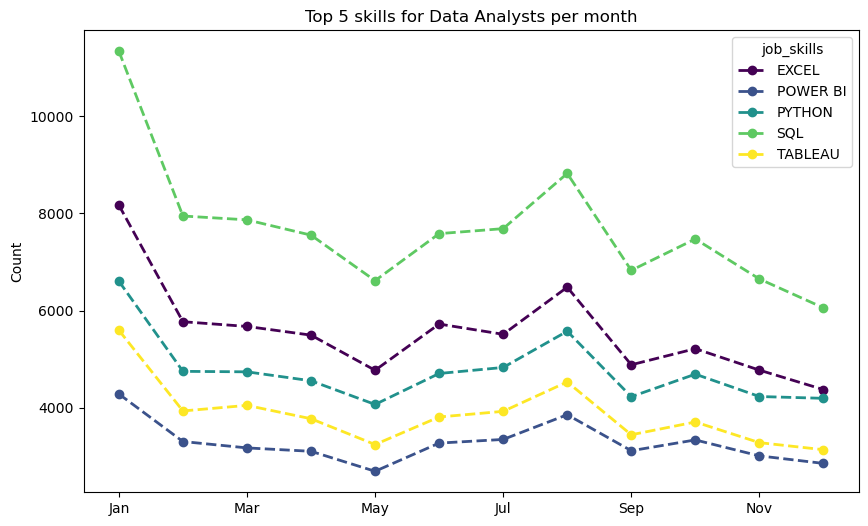

In [38]:
df_DA_pivot.plot(
  kind="line", 
  title="Top 5 skills for Data Analysts per month", 
  ylabel="Count", 
  xlabel="",
  linewidth=2,
  linestyle="--",
  colormap="viridis",
  marker="o",
  figsize=(10,6)
)